In [1]:
import matplotlib.pyplot as plt
import os
osp = os.path
import torch
import numpy as np
from importlib import reload

In [2]:
import nerfsampler.inrs.mlp as mlp
from nerfsampler import inn, RESULTS_DIR, TMP_DIR
from nerfsampler.utils import util
from nerfsampler.experiments import experiment
from nerfsampler.utils import jobs
from nerfsampler.utils import losses
from nerfsampler.inn import point_set
from nerfsampler.inrs import fit_video
import nerfsampler.inn.functional as inrF
%matplotlib inline
plt.rcParams["figure.figsize"] = (4.0, 3.0)
plt.rcParams['figure.dpi'] = 200
DS_DIR = osp.expandvars("$DS_DIR")

In [ ]:
bash train.sh warp_i3
python train.py -c=gen_nn4
bash infer.sh ival_mlp inet_val inet_mlp

# interactive

### cmd line

In [4]:
exp = experiment.create_sweep('fetal_nerf', target='recon_loss')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: phqjr1sc
Sweep URL: https://wandb.ai/clintonjwang/nerfsampler/sweeps/phqjr1sc


In [ ]:
exp = experiment.create_sweep('nuft_cls')

In [ ]:
sbatch -a 1-8 -J phqjr1sc --export=ALL swfit.sh

sbatch -a 1-2 -J ijh8rrnz --export=ALL,conf='inet_mlp' sweep.sh
sbatch -a 1-10 -J qk7srlmo --export=ALL,conf='inet_nuft' sweep.sh
sbatch -a 5-10 -J jxdlxoqf --export=ALL,conf='seg_hyper' sweep.sh
sbatch -a 1-10 -J 8dp1ijae --export=ALL,conf='seg_nuft' sweep.sh

In [ ]:
bash infer.sh ival_mlp ival_siren 3bvtijbi_1
bash infer.sh seg_hyper3 seg_val_c jxdlxoqf_3
bash infer.sh seg_nuft1 seg_val_c 3bvtijbi_1

### nuft

In [ ]:
util.glob2('/data/vision/polina/scratch/clintonw/datasets/DVR/ShapeNet/02691156/9705e3c2d21106ced7f23cd024f22c12')

In [ ]:
import torch
import torchkbnufft as tkbn
import numpy as np
from skimage.data import shepp_logan_phantom
pi = torch.pi
x = shepp_logan_phantom().astype(complex)
im_size = x.shape
values = torch.tensor(x).unsqueeze(0).unsqueeze(0)

plt.imshow(np.abs(values.squeeze().numpy()))


In [ ]:
nufft_ob = tkbn.KbNufftAdjoint(im_size)
coords = torch.stack(torch.meshgrid(torch.linspace(-pi, pi, im_size[0]),
    torch.linspace(-pi, pi, im_size[1])), dim=-1).reshape(-1, 2).float()
ifft = nufft_ob(values.to(torch.complex64).flatten(-2), coords.transpose(0, 1))
plt.imshow(np.abs(ifft.squeeze().numpy()))

In [ ]:
recon = torch.fft.fftshift(torch.fft.fft2(ifft))
plt.imshow(np.abs(recon.abs().squeeze().numpy()))

### objectfolder

In [ ]:
python OF_render.py --modality vision \
      --object_file_path /data/vision/polina/scratch/clintonw/datasets/objectfolder/ObjectFolder1-100/1/ObjectFile.pth \
      --vision_test_file_path ~/code/ObjectFolder/demo/vision_1.npy \
      --vision_results_dir ~/code/ObjectFolder/results


In [265]:
x = torch.linspace(-1,1,16, dtype=torch.float, device='cuda')

In [ ]:
df['material'][0]

In [278]:
df = df[df['material'].isin(('Ceramic', 'Polycarbonate', 'Wood'))]

In [ ]:
for n in df.index:
    print(n)

In [ ]:
df = pd.read_csv(osp.expanduser('~/code/ObjectFolder/objects.csv'),
                 names=['id', 'name', 'volume', 'material', 'url'], index_col=0)

In [256]:
df = pd.read_csv(osp.expanduser('~/code/ObjectFolder/objects300.csv'), index_col=0)

In [255]:
df[:300].to_csv(osp.expanduser('~/code/ObjectFolder/objects300.csv'))

In [224]:
out = np.load(osp.expanduser('~/code/ObjectFolder/demo/vision_1.npy'))

In [ ]:
out

In [223]:
np.save(osp.expanduser('~/code/ObjectFolder/demo/vision_1.npy'), out[:1])

In [ ]:
bash train.sh gen_nn4 gen_nn4
bash train.sh gen_i4 gen_i4
python train.py -c=gen_nn4

In [ ]:
bash train.sh warp_inn warp_train
bash train.sh warp_nn warp_nn

### random fourier features

In [16]:
paths = util.glob2('/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/*/test_*.pt')
# for path in paths:
#     os.remove(path)

In [ ]:
path = '/data/vision/polina/scratch/clintonw/datasets/inrnet/cityscapes/fine_val_0.pt'
sd,seg = torch.load(path)
sinr = siren.Siren()
sinr.load_state_dict(sd)
sinr = siren.to_black_box([sinr])
img = sinr.cuda().produce_images(256,256)

In [33]:
path = '/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/6/val_4.pt'
sd = torch.load(path)
sinr = siren.Siren()
sinr.load_state_dict(sd)
sinr = siren.to_black_box([sinr])
img = sinr.cuda().produce_images(256,256)

In [35]:
path = '/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/6/test_4.pt'
sd = torch.load(path)
inr = rff.RFFNet()
inr.load_state_dict(sd)
inr = rff.to_black_box([inr])
img2 = inr.cuda().produce_images(256,256)

In [ ]:
import imgviz
labelviz_pred = imgviz.label2rgb(seg.max(0).indices)
plt.imshow(labelviz_pred); plt.axis('off')

In [ ]:
util.imshow(img)

In [ ]:
util.imshow(torch.cat(((img+1)/2, img2), dim=-1))

In [163]:
m = torchvision.models.resnet18(pretrained=False)

### audio

In [92]:
df = pd.read_csv(f'{DS_DIR}/environmental-sound-classification/esc50.csv')
classes = np.array(df[['target', 'category']]).tolist()
classes = set(['{} {}'.format(c[0], c[1]) for c in classes])
classes = np.array([c.split(' ') for c in classes])
classes = {k: v for k, v in classes}

In [ ]:
classes

In [95]:
from inrnet.data.audio import utils
ESC50 = utils.ESC50

In [ ]:
train_splits = [1,2,3,4]
test_split = 5

shared_params = {'csv_path': f'{DS_DIR}/environmental-sound-classification/esc50.csv',
                 'wav_dir': f'{DS_DIR}/environmental-sound-classification/audio',
                 'dest_dir': f'{DS_DIR}/environmental-sound-classification/16000',
                 'audio_rate': 16000,
                 'only_ESC10': True,
                 'pad': 0,
                 'normalize': True}

train_gen = ESC50(folds=train_splits,
                  randomize=True,
                  strongAugment=True,
                  random_crop=True,
                  inputLength=2,
                  mix=True,
                  **shared_params).batch_gen(16)

test_gen = ESC50(folds=[test_split],
                 randomize=False,
                 strongAugment=False,
                 random_crop=False,
                 inputLength=4,
                 mix=False,
                 **shared_params).batch_gen(16)

X, Y = next(train_gen)

### fashionMNIST

In [36]:
ds = torchvision.datasets.FashionMNIST(root=DS_DIR, train=True)#, transform=transforms.ToTensor())
len(ds)
#inr = siren.Siren(out_channels=1, C=64, first_omega_0=20, hidden_omega_0=20)
# xy = util.meshgrid_coords(28,28, c2f=False)
# r = xy.norm(dim=-1)
# torch.sin(theta)
# maxr_theta = min()
# theta = torch.atan2(xy[:,1], xy[:,0])
# theta.max()
# plt.imshow(ds[0][0][0], cmap='gray')

60000

In [ ]:
paths = [f"{DS_DIR}/inrnet/fmnist/train_{ix}.pt" for ix in range(60000)]
paths = [p for p in paths if osp.exists(p)]

In [48]:
for p in paths:
    x = osp.basename(p)[:-3]
    x = x[x.find('_')+1:]
    ix = int(x)
    ix_to_cls[ix] = torch.load(p)[1]
    break

In [39]:
torch.save(ix_to_cls, f"{DS_DIR}/inrnet/fmnist/ix_to_cls.pt")

### warp

In [175]:
subset='train'
paths = util.glob2(f"{DS_DIR}/inrnet/oasis/{subset}_*_0.pt")

In [ ]:
torch.load(paths[0])[0]['net.4.weight'].shape

In [ ]:
labels = open('/data/vision/polina/scratch/clintonw/datasets/oasis/seg4_labels.txt', 'r')
labels.readlines()

orig_img /= orig_img.max()
orig_seg = (seg==3).float()
vf2df = DVF2DDF()
warp = Warp()
VFs = F.interpolate(torch.randn(3,2,H//16,W//16), scale_factor=16)*2 + \
      F.interpolate(torch.randn(3,2,H//8,W//8), scale_factor=8) + \
      F.interpolate(torch.randn(3,2,H//4,W//4), scale_factor=4)/2
VFs[1:2] = VFs[:1]+VFs[1:2]
VFs[2:3] = VFs[1:2]+VFs[2:3]
w1 = warp(orig_img, vf2df(VFs[:1]))
w2 = warp(orig_img, vf2df(VFs[1:2]))
w3 = warp(orig_img, vf2df(VFs[2:3]))
s1 = warp(orig_seg, vf2df(VFs[:1]))
s2 = warp(orig_seg, vf2df(VFs[1:2]))
s3 = warp(orig_seg, vf2df(VFs[2:3]))
segs = (orig_seg.bool(), s1>.5, s2>.5, s3>.5)

plt.imshow(s3.squeeze())

### sympy

In [151]:
from sympy import sin, cos, tan, exp, log, integrate
from sympy.abc import a,b,c,n,m,x,y
from sympy import Point, Polygon
from sympy.integrals.intpoly import polytope_integrate

In [149]:
from sympy.functions.special import polynomials, spherical_harmonics

In [173]:
function = (3*polynomials.legendre(2, x)-2*polynomials.legendre(1, x) - 1) * \
    (.6*polynomials.legendre(4, y)-polynomials.legendre(1, y)+1.1)

In [ ]:
function

In [162]:
polygon = Polygon(Point(0, 0), Point(0, 1), Point(1, 1), Point(1, 0))
# polys = [1, x, y, x*y, x**2*y, x*y**2]
# expr = x*y

In [174]:
polytope_integrate(polygon, expr=function)

nan

In [146]:
polytope_integrate(polygon, expr=expr)

1/4

In [147]:
polytope_integrate(polygon, polys, max_degree=3)

{1: 1, x: 1/2, y: 1/2, x*y: 1/4, x**2*y: 1/6, x*y**2: 1/6}

### inet12

In [3]:
from inrnet.models.inrs import siren
keys = siren.get_siren_keys()

In [12]:
from robustness.tools.imagenet_helpers import ImageNetHierarchy, common_superclass_wnid
in_path = '/data/vision/polina/scratch/clintonw/datasets/imagenet_pytorch'
in_hier = ImageNetHierarchy(in_path, in_path)
superclass_wnid = common_superclass_wnid('big_12')
class_ranges, label_map = in_hier.get_subclasses(superclass_wnid,
                                                 balanced=True)

In [10]:
subpaths = open("/data/vision/polina/scratch/clintonw/datasets/imagenet_pytorch/train.txt",
            "r").read().split('\n')
labels = open("/data/vision/polina/scratch/clintonw/datasets/imagenet_pytorch/labels.txt",
            "r").read().split('\n')
labels = [l[:l.find(',')] for l in labels[:-1]]
class_labels = [np.array(labels)[list(cr)].tolist() for cr in class_ranges]

In [ ]:
sub_to_super = {}
for supercls,subclasses in enumerate(class_ranges):
    for subcls in subclasses:
        sub_to_super[subcls] = supercls

# big12path = f"{DS_DIR}/inrnet/big_12.pkl"
# pickle.dump((label_map, class_ranges, sub_to_super), open(big12path, 'wb'))
# label_map, class_ranges, sub_to_super = pickle.load(open(big12path, 'rb'))

In [ ]:
label_to_super = {}
for supercls,subclasses in enumerate(class_labels):
    for subcls in subclasses:
        label_to_super[subcls] = supercls

In [ ]:
N = 800
subpaths_by_cls = [[] for _ in range(12)]
for path in subpaths:
    label = osp.basename(osp.dirname(path))
    if label in label_to_super.keys():
        subpaths_by_cls[label_to_super[label]].append(path)

for p in subpaths_by_cls:
    np.random.shuffle(p)

split_paths_by_cls = {'train':[p[:N] for p in subpaths_by_cls],
                     'test':[p[N:] for p in subpaths_by_cls]}

# big12path = f"{DS_DIR}/inrnet/big_12_labels.pkl"
# pickle.dump((split_paths_by_cls, class_labels, label_to_super), open(big12path, 'wb'))
# split_paths_by_cls, class_labels, label_to_super = pickle.load(open(big12path, 'rb'))

In [19]:
subpaths_by_cls = [[] for _ in range(12)]
for path in subpaths:
    label = osp.basename(osp.dirname(path))
    if label in label_to_super.keys():
        subpaths_by_cls[label_to_super[label]].append(path)

for p in subpaths_by_cls:
    np.random.shuffle(p)

In [26]:
N = 23400
subpaths_by_cls = [p[:N] for p in subpaths_by_cls]

In [27]:
big12path = f"{DS_DIR}/inrnet/big_12_extra.pkl"
pickle.dump(subpaths_by_cls, open(big12path, 'wb'))
# subpaths_by_cls = pickle.load(open(big12path, 'rb'))

In [ ]:
paths = util.glob2('/data/vision/polina/scratch/clintonw/datasets/inrnet/cityscapes/train_*.pt')
for p in paths:
    weights, seg = torch.load(p)
    break

# Tables

### Classify

In [13]:
model_jobs = {
    # 'Grid$\\to$Grid':('grid_to_grid',),
    # 'Grid$\\to$QMC':('grid_to_qmc',),
    # 'QMC$\\to$Grid':('qmc_to_grid',),
    # 'QMC$\\to$QMC':('qmc_to_rqmc',),
    # 'QMC$\\to$Shrunk':('qmc_to_hid',),
    # 'Shrunk$\\to$QMC':('hid_to_qmc',),
    # 'Shrunk$\\to$Shrunk':('hid_to_hid',),
    # 'QMC$\\to$QMC':('ival_i2qq',),
    # 'Grid$\\to$Grid':('ival_i2gg',),
    # 'Shrunk$\\to$Shrunk':('ival_i2ss',),
    # 'Grid$\\to$QMC':('ival_i2gq',),
    # 'QMC$\\to$Grid':('ival_i2qg',),
    # 'QMC$\\to$Shrunk':('ival_i2qs',),
    # 'Shrunk$\\to$QMC':('ival_i2sq',),
    # 'Grid$\\to$Shrunk':('ival_i2gs',),
    # 'Shrunk$\\to$Grid':('ival_i2sg',),

    'DI-Net-2':('ival_i2_half', 'ival_i2', 'ival_i2_1x5', 'ival_i2_2x', 'ival_i2_3x', 'ival_i2_4x'),
    # 'DI-Net-4':('ival_i4_half', 'ival_i4', 'ival_i4_2x', 'ival_i4_3x', 'ival_i4_4x'),
    # '2-layer CNN':('ival_nn2_half', 'ival_nn2', 'ival_nn2_2x', 'ival_nn2_3x', 'ival_nn2_4x'),
    # '4-layer CNN':('ival_nn4_half', 'ival_nn4', 'ival_nn4_2x', 'ival_nn4_3x', 'ival_nn4_4x'),
    # 'MLP':['ival_mlp'],
    # 'NUFT':['ival_nuft'],

#     '2-layer CNN':('i1x_nn2', 'i2x_nn2'),
#     '4-layer CNN':('i1x_nn5', 'i2x_nn5'),
#     f'\modelname-2 (ours)':('i1x_i2', 'i2x_i2'),
#     f'\modelname-5 (ours)':('i1x_i5', 'i2x_i5'),
    
    # 'val set (SIRENs)':('is_i2','is_w2','is_a2','is_nn2'),
    
#     'EfficientNet \cite{efficientnet}':('i1x_nn', 'i2x_nn'),
#     'INR-ft (ours)':('i1x_inn', 'i2x_inn'),
#     'INR-mlp (ours)':('i1x_mlp', 'i2x_mlp'),
}
N = 2304# 200*12
df = pd.DataFrame(columns=['model','top3','res'])
for model,row in model_jobs.items():
    rowstr = [model]
    for job in row:
        # path = osp.join(RESULTS_DIR, job, "stats.pt")
        path = osp.join(RESULTS_DIR, job, "stats.txt")
        if not osp.exists(path):
            print(f'missing {job} results at {path}')
            rowstr.append("nan")
        else:
            top3, top1, N, _ = map(float, open(path, 'r').read().split(', '))
            # top1, top3 = torch.load(path)
            rowstr.append(util.format_float(top1/N*100, n_decimals=1)+r"\%")
    print(' & '.join(map(str,rowstr)) + r' \\')
#     if model.endswith('ours)'):
#         print(r'\hline')

DI-Net-2 & 32.2\% & 32.9\% & 30.9\% & 33.6\% & 33.4\% & 33.8\% \\


In [11]:
torch.load(path)

(703.0, 1340.0)

In [4]:
model_jobs = {
    '2-layer DI-Net':('ival_i2_half', 'ival_i2', 'ival_i2_1x5', 'ival_i2_2x', 'ival_i2_2x5', 'ival_i2_3x'),# 'ival_i2_4x'),
    '4-layer DI-Net':('ival_i4_half', 'ival_i4', 'ival_i4_1x5', 'ival_i4_2x', 'ival_i4_2x5', 'ival_i4_3x'),# 'ival_i4_4x'),
    '2-layer CNN':(
        'ival_nn2_half', 'ival_nn2', 'ival_nn2_1x5', 'ival_nn2_2x', 'ival_nn2_2x5', 'ival_nn2_3x'),# 'ival_nn2_4x'),
    '4-layer CNN':('ival_nn4_half', 'ival_nn4', 'ival_nn4_1x5', 'ival_nn4_2x', 'ival_nn4_2x5', 'ival_nn4_3x'),# 'ival_nn4_4x'),
}
R = np.array([.5,1,1.5,2,2.5,3])*32
df = pd.DataFrame(columns=['model','res','top3'])
for model,row in model_jobs.items():
    rowstr = [model]
    for res,job in zip(R, row):
        path = osp.join(RESULTS_DIR, job, "stats.txt")
        if not osp.exists(path):
            df.loc[len(df.index)] = [model, res, 0]
        else:
            top3, top1, N, _ = map(float, open(path, 'r').read().split(', '))
            df.loc[len(df.index)] = [model, res, top1/N*100]

/tmp/ipykernel_1339/2422471987.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x/100) for x in vals]);


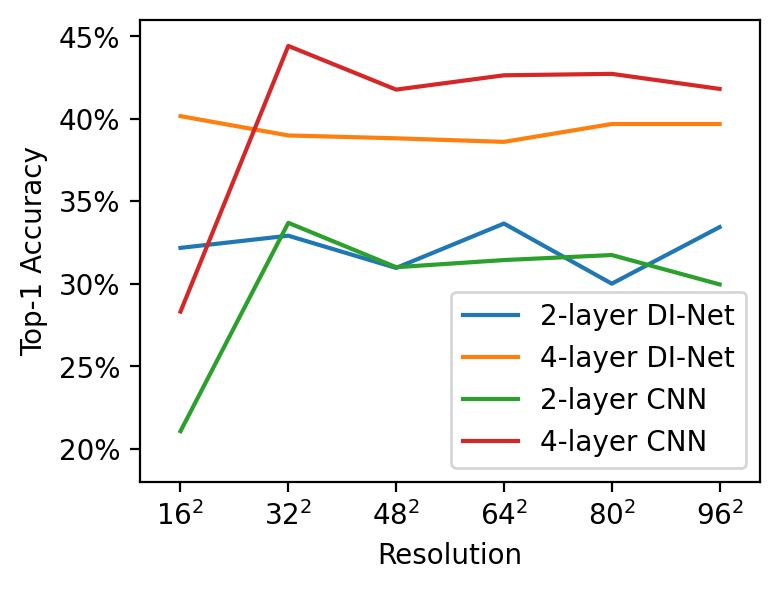

In [5]:
import seaborn as sns
ax = sns.lineplot(x='res', y='top3', hue='model', data=df)
ax.set_xlabel('Resolution')
ax.set_ylabel('Top-1 Accuracy')
ax.set_xlim(10, 102)
ax.set_xticks(R)
ax.set_xticklabels(list(map(lambda x:f"${int(x)}^2$", R)))
ax.set_ylim(18, 46)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x/100) for x in vals]);
ax.legend().set_title(None)

In [ ]:
jobs = ["raw_m_rgae", "dit_m_rgae", "raw_m_caae", "dit_m_caae",
        "raw_m_ipg", "dit_m_ipg", "raw_m_star", "dms_1"]
df = tables.get_results_table()
subtable = df.loc[jobs]

def latex_format(value, n_decimals=2, bold=False):
    if bold:
        return (r'$\bm{{{0:.%df}}}$'%n_decimals).format(value)        
    else:
        return (r'${0:.%df}$'%n_decimals).format(value)
def plus_minus_format(mean, std, n_decimals=2, bold=False):
    if bold:
        return (r'$\bm{{{0:.%df}}}$\scriptsize$\bm{{\pm {1:.%df}}}$'%(n_decimals, n_decimals)).format(mean, std)        
    else:
        return (r'${0:.%df}$\scriptsize$\pm {1:.%df}$'%(n_decimals, n_decimals)).format(mean, std)

def print_row(name, row, bold=()):
    field1 = latex_format(row["FID_tuned"], bold=1 in bold)
    field2 = latex_format(row["F_{1/8}"], bold=2 in bold)
    field3 = latex_format(row["F_8"], bold=3 in bold)
    field4 = plus_minus_format(row["age mean error"], row["age error STD"], bold=4 in bold)
    print(" & ".join([name, field1, field2, field3, field4]) + r" \\")

### Segment

In [75]:
model_jobs = {
#     'CNN-3':('scc_nn3c','scf_nn3',), #sff_nn3
#     'INR-3 (ours)':('scc_i3c','scf_i3'),
#     'CNN-5':('scc_nn5c','scf_nn5',),
#     'INR-5 (ours)':('scc_i5c','scf_i5',),

#     'Grid$\\to$QMC':['seg_g2q'],
#     'Grid$\\to$Grid':['seg_g2g'],
#     'QMC$\\to$Grid':['seg_q2g'],
#     'QMC$\\to$QMC':['seg_q2q'],
#     'Mask$\\to$Mask':['seg_m2m'],
#     'Mask$\\to$QMC':['seg_m2q'],
#     'Mask$\\to$Grid':['seg_m2g'],
#     'QMC$\\to$Mask':['seg_q2m'],
#     'Grid$\\to$Mask':['seg_g2m'],
    
    'ConvNexT':['sval_nn'],
    'INR-tuned':['sval_cn'],#['sval_cn'],
}
for model,row in model_jobs.items():
    rowstr = [model]
    for job in row:
        path = osp.join(RESULTS_DIR, job, "stats.pt")
        if not osp.exists(path):
            print(f'missing {job} results at {path}')
            rowstr.append("nan")
        else:
            iou, acc = torch.load(path)
            rowstr.append(util.format_float(np.nanmean(iou), n_decimals=3))
            rowstr.append(util.format_float(np.mean(acc)*100, n_decimals=1)+r"\%")
    print(' & '.join(map(str,rowstr)) + r' \\')
#     if model.endswith('ours)'):
#         print(r'\hline')

ConvNexT & 0.429 & 68.1\% \\
INR-tuned & 0.376 & 68.7\% \\


### Generate

In [ ]:
model_jobs = {'EffNet-T':('f1x_nn', 'f2x_nn', 'fhx_nn'),
    'INR-tuned (ours)':('f1x_inn', 'f2x_inn', 'fhx_inn'),
    'INR-scratch (ours)':('f1x_scr', 'f2x_scr', 'fhx_scr')}
N = 200*12
for model,row in model_jobs.items():
    rowstr = [model]
    for job in row:
        path = osp.join(RESULTS_DIR, job, "stats.pt")
        if not osp.exists(path):
            print(f'missing {job} results at {path}')
            rowstr.append("nan")
        else:
            top1, top3 = torch.load(path)
            rowstr.append(util.format_float(top3/N*100, n_decimals=1)+r"\%")
    print(' & '.join(map(str,rowstr)) + r' \\')

# Figs

## for framework

In [ ]:
sampler = sqmc.Sobol(d=2, scramble=True)
xy = sampler.random_base2(m=int(math.log2(256)))
plt.rcParams["figure.figsize"] = (1,1)
fig,ax = plt.subplots()
ax.scatter(xy[:,0], xy[:,1], s=2, c='k')
ax.plot();
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([]);

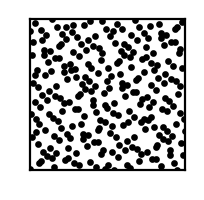

In [48]:
sampler = sqmc.Halton(d=2, scramble=True)
xy = sampler.random(n=256)
plt.rcParams["figure.figsize"] = (1,1)
fig,ax = plt.subplots()
ax.scatter(xy[:,0], xy[:,1], s=2, c='k')
ax.plot();
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([]);

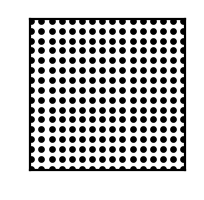

In [44]:
xy = np.stack(np.meshgrid(np.linspace(.01, .99, 16), np.linspace(.01, .99, 16))).transpose().reshape(-1,2)
plt.rcParams["figure.figsize"] = (1,1)
fig,ax = plt.subplots()
ax.scatter(xy[:,0], xy[:,1], s=2, c='k')
ax.plot();
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([]);

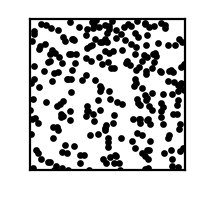

In [45]:
xy = np.random.rand(256,2)
plt.rcParams["figure.figsize"] = (1,1)
fig,ax = plt.subplots()
ax.scatter(xy[:,0], xy[:,1], s=2, c='k')
ax.plot();
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([])
plt.yticks([]);

In [ ]:
xy = qmc.generate_quasirandom_sequence(d=2, n=256, scramble=True)
plt.rcParams["figure.figsize"] = (1,1)
fig,ax = plt.subplots()
ax.scatter(xy[:,0], xy[:,1], s=2, c='k')
ax.plot();

coords = gen_inr.parent(10).sampled_coords
fig,ax = plt.subplots()
ax.scatter(coords[:,0].cpu().numpy(), coords[:,1].cpu().numpy(), s=2, c='k')
ax.plot();
path = paths["job output dir"]+f"/imgs/{global_step}.png"
plt.savefig(path)

In [ ]:
kernel = model.features[0][0].weight[3,1].detach()
plt.rcParams["figure.figsize"] = (.5,.5)
fig,ax = plt.subplots()
print(kernel.min().item(), kernel.max().item())
ax.imshow(kernel, vmin=-2.9, vmax=2.9);
plt.axis('off');

In [100]:
from scipy.interpolate import RectBivariateSpline as Spline2D
K = [2.5,2.5]
h,w=3,3
bbox = (-K[0]/2, K[0]/2, -K[1]/2, K[1]/2)
x,y = (np.linspace(bbox[0]/h*(h-1), bbox[1]/h*(h-1), h),
       np.linspace(bbox[2]/w*(w-1), bbox[3]/w*(w-1), w))
bs = Spline2D(x,y, kernel, bbox=bbox, kx=2,ky=2, s=0)
tx,ty,c = [torch.tensor(z).float() for z in bs.tck]
c = c.reshape(h,w)

In [106]:
H = 50
xy = util.meshgrid_coords(H,H).cpu()
w_oi = []
X = xy[:,0].unsqueeze(1)
Y = xy[:,1].unsqueeze(1)
px = py = 2

values, kx = (tx<=X).min(dim=-1)
values, ky = (ty<=Y).min(dim=-1)
kx -= 1
ky -= 1
kx[values] = tx.size(-1)-px-2
ky[values] = ty.size(-1)-py-2

Ctrl = c.view(1, *c.shape[-2:])
for z in range(X.size(0)):
    D = Ctrl[:, kx[z]-px : kx[z]+1, ky[z]-py : ky[z]+1].clone()

    for r in range(1, px + 1):
        try:
            alphax = (X[z,0] - tx[kx[z]-px+1:kx[z]+1]) / (
                tx[2+kx[z]-r:2+kx[z]-r+px] - tx[kx[z]-px+1:kx[z]+1])
        except RuntimeError:
            print("input off the grid")
        for j in range(px, r - 1, -1):
            D[:,j] = (1-alphax[j-1]) * D[:,j-1] + alphax[j-1] * D[:,j].clone()

    for r in range(1, py + 1):
        alphay = (Y[z,0] - ty[ky[z]-py+1:ky[z]+1]) / (
            ty[2+ky[z]-r:2+ky[z]-r+py] - ty[ky[z]-py+1:ky[z]+1])
        for j in range(py, r-1, -1):
            D[:,px,j] = (1-alphay[j-1]) * D[:,px,j-1].clone() + alphay[j-1] * D[:,px,j].clone()

    w_oi.append(D[:,px,py])

w = torch.stack(w_oi).view(xy.size(0))

In [107]:
k = w.reshape(H,H)

In [ ]:
fig,ax = plt.subplots()
print(k.min().item(), k.max().item())
ax.imshow(k, vmin=-2.9, vmax=2.9);
plt.axis('off');

## analysis

### discrepancy of grid vs QMC

In [ ]:
n = np.arange(4,256)
nsub = np.array([4,8,16,32,64,128,256])
N = n**2
D_grid = 2/N - 1/(N+1)
D_qmc = 0.23335 * np.log(N) / N

In [ ]:
sns.lineplot(x=np.log(N), y=np.log(D_grid), label='grid')
sns.lineplot(x=np.log(N), y=np.log(D_qmc), label='QMC')
plt.xticks(np.log(nsub**2), map(lambda x: f'${x}^2$',nsub));

In [ ]:

classify.analyze_change_resolution_grid_vs_qmc()

In [ ]:
ax = sns.lineplot(x=torch.linspace(128,256,10), y=torch.linspace(.5,.8,10)+torch.randn(10)/8, label="qmc");
sns.lineplot(x=torch.linspace(128,256,10), y=torch.linspace(.1,.8,10)+torch.randn(10)/8, label="grid", ax=ax);
ax.set_xlabel("Number of sample points");
ax.set_ylabel("ImageNet top-1 error");

### approximation error of integral over grid vs QMC

In [95]:
paths = ['../temp/1.jpg', '../temp/2.jpg', '../temp/3.jpg', '../temp/4.jpg',
'../temp/1.png', '../temp/2.png', '../temp/3.png']
data = pd.DataFrame(columns=['Discretization', 'Resolution', 'Integral Error'])
nlist = [16,32,64,128,256]
for path in paths:
    img = Image.open(path)
    img = transforms.ToTensor()(img)
    img /= img.flatten(1).mean(1).unsqueeze(1).unsqueeze(1)
    for n in nlist:
        small = transforms.Resize((n,n), transforms.InterpolationMode.NEAREST)(img).flatten(1)
        coords = point_set.gen_LD_seq_bbox(n=n*n, bbox=((0, img.size(1)), (0, img.size(2))), scramble=True)
        coo = torch.floor(coords).long()
        qmc_img = img[...,coo[:,0], coo[:,1]]
        grid_err = (small.mean(1) - 1).abs().mean().item()
        qmc_err = (qmc_img.mean(1) - 1).abs().mean().item()
        data.loc[len(data)] = ['Grid', n, grid_err]
        data.loc[len(data)] = ['QMC', n, qmc_err]

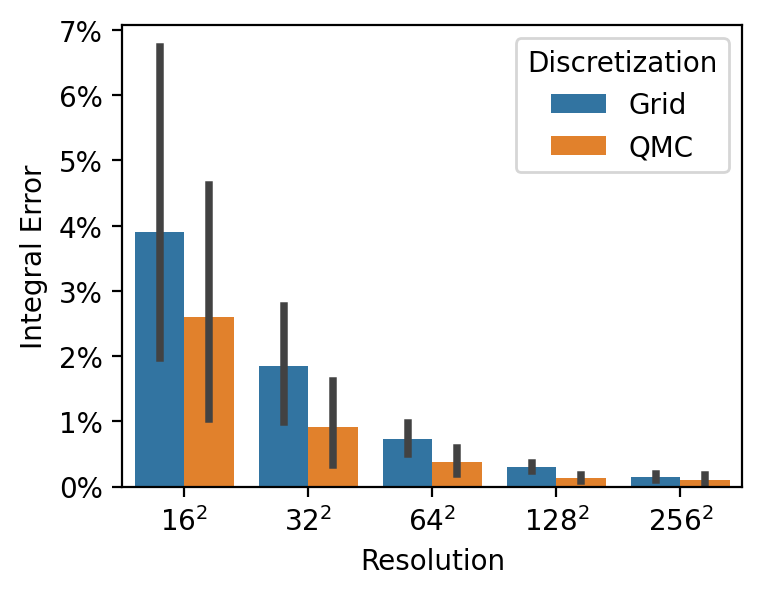

In [108]:
sns.barplot(data=data, x='Resolution', y='Integral Error', hue='Discretization');
yy = plt.yticks()[0][:-1]
plt.yticks(yy, map(lambda x: f'{x*100:.0f}%', yy));
xx = plt.xticks()[0]
plt.xticks(plt.xticks()[0], map(lambda x: f'${x}^2$',nlist));

In [ ]:
n = np.arange(4,256)
nsub = np.array([4,8,16,32,64,128,256])
N = n**2

### Deviation over depth

### Resolution vs. output (grid & QMC)

In [42]:
base_logits, grid_logits, grid_masks, qmc_logits, qmc_masks = torch.load(osp.expandvars(
    '$NFS/code/diffcoord/temp/change_resolution_grid_vs_qmc.pt'))

In [43]:
grid_dists = (torch.cat(grid_logits, dim=0) - base_logits.cpu()).norm(dim=-1)
qmc_dists = (torch.cat(qmc_logits, dim=0) - base_logits.cpu()).norm(dim=-1)

In [46]:
RES = np.round(np.logspace(4, 8, num=9, base=2)).astype(int)

In [ ]:
plt.rcParams["figure.figsize"] = (2.0, 1.5)
x = np.arange(7)
plt.plot(x,qmc_dists[1:], label='qmc');
plt.plot(x,grid_dists[1:], label='grid');
plt.xticks(ticks=[1,3,5],labels=(32,64,128))
plt.yticks([]);
# plt.legend()

In [ ]:
grid_dists

In [ ]:
torch.sort(base_logits[0]).indices

In [ ]:
torch.sort(qmc_logits[-1][0]).indices

In [ ]:
plt.bar(grid_dists)

In [208]:
front_g_m = torch.stack([m[0].float().mean() for m in grid_masks], dim=0)
front_g_s = torch.stack([m[0].float().std() for m in grid_masks], dim=0)
back_g_m = torch.stack([m[1].float().mean() for m in grid_masks], dim=0)
back_g_s = torch.stack([m[1].float().std() for m in grid_masks], dim=0)

In [ ]:
front_g_m, front_g_s

In [ ]:
back_g_m, back_g_s

In [185]:
front_q_m = torch.stack([m[0].float().mean() for m in qmc_masks], dim=0)
front_q_s = torch.stack([m[0].float().std() for m in qmc_masks], dim=0)
back_q_m = torch.stack([m[1].float().mean() for m in qmc_masks], dim=0)
back_q_s = torch.stack([m[1].float().std() for m in qmc_masks], dim=0)

In [ ]:
front_q_m, front_q_s

In [ ]:
back_q_m, back_q_s

### RQMC variance

In [37]:
base_logits, logits, masks = torch.load(osp.expanduser('~/code/diffcoord/temp/output_variance_rqmc.pt'))

In [38]:
logit_dists = (torch.cat(logits, dim=0) - base_logits.cpu()).norm(dim=-1)

In [ ]:
base_logits

In [ ]:
logit_dists

In [ ]:
fronts = torch.stack([m[0] for m in masks], dim=0).float()
backs = torch.stack([m[1] for m in masks], dim=0).float()

In [ ]:
fronts.mean(1), fronts.std(1), fronts.amin(1), fronts.amax(1)

In [ ]:
backs.mean(1), backs.std(1), backs.amin(1), backs.amax(1)

### grid-QMC interpolation

In [ ]:
base_logits, grid_logits, grid_mask, qmc_logits, qmc_mask, intermediate_logits, intermediate_masks = torch.load(osp.expanduser('~/code/diffcoord/temp/analyze_logit_mismatch.pt'))

x = np.arange(0,1.01,.05)
fronts = torch.stack([grid_mask[0], *[m[0] for m in intermediate_masks[::-1]], qmc_mask[0]], dim=0).float()
backs = torch.stack([grid_mask[1], *[m[1] for m in intermediate_masks[::-1]], qmc_mask[1]], dim=0).float()
f_m, f_s = fronts.mean(1), fronts.std(1)
b_m, b_s = backs.mean(1), backs.std(1)

fig,ax = plt.subplots()
width = .007
ax.errorbar(x-width/2, f_m, yerr=f_s, label='front')
ax.errorbar(x+width/2, b_m, yerr=b_s, label='back')

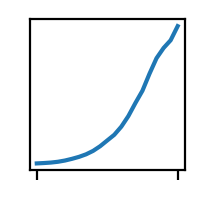

In [211]:
y = (torch.cat([grid_logits, *intermediate_logits[::-1], qmc_logits], dim=0) - base_logits.cpu()).norm(dim=1)
plt.plot(x,y);
plt.xticks(ticks=[0,1],labels=('',''))
plt.yticks([]);

# slurm

In [45]:
coco_len = 118287
kitti_len = 80896
horse_len = 1067
zebra_len = 1334
inet_len = 50000
in_tr_len = 50000

In [ ]:
for ix in range(0,places_len,800):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/places/siren_{ix+63}.pt"):
        print("sh fit_inr.sh", f"place{ix//800}", "fit_places", ix)

In [ ]:
for ix in range(0,in_tr_len,800):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/imagenet1k_train/siren_{ix+63}.pt"):
        print("sh fit_inr.sh", f"inet{ix//800}", "fit_in_tr", ix)

In [ ]:
for ix in range(0,60000,5000):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/fmnist/train_{ix+1}.pt"):
        print("sh fit_inr.sh", f"fmn{ix//5000}", "fit_fmnist", ix)

In [ ]:
for ix in range(0,12000,100):
    c,i=ix//1000, ix%1000
    if i >= 800:
        i-=800
        s='val'
    else:
        s='train'
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/{c}/{s}_{i+3}.pt"):
        print("sh fit_inr.sh", f"inet{ix//100}", "fit_i12", ix)

In [35]:
for ix in range(0,2400,50):
    c,i = ix%12, ix//12
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/{c}/test_{i+1}.pt"):
        print("sh fit_inr.sh", f"rff{ix//50}", "fit_in_rff", ix)

In [ ]:
#23400 * 12 = 280800 total images
#15000/12 + 800 = 2050 current images per class
for ix in range(36000,48000,100):
    cls, start_ix = ix % 12, ix // 12 + 800
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/{cls}/train_{start_ix+4}.pt"):
        print("sh fit_inr.sh", f"inet{ix//100}", "fit_i12", ix)

In [ ]:
for ix in range(0,8189,100):
    i = ix
    if i < 1020:
        s='train'
    elif i < 2040:
        s='val'
        i -= 1020
    else:
        s='test'
        i -= 2040
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/flowers/{s}_{i+50}.pt"):
        print("sh fit_inr.sh", f"flow{ix//100}", "fit_flower", ix)

In [ ]:
for ix in range(3475,4475,100):
    i = ix
    if i >= 2975:
        i -= 2975
        s = 'val'
    else:
        s = 'train'
        i -= 500
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/cityscapes/{s}_{i+1}.pt"):
        print("sh fit_inr.sh", f"city{ix//100}", "fit_city", ix)

In [46]:
for ix in range(0,inet_len,800):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/imagenet1k_val/siren_{ix+63}.pt"):
        print("sh fit_inr.sh", f"inet{ix//800}", "fit_inet", ix)

In [37]:
x[0,0] = 1

In [ ]:
for ix in range(0,coco_len,1600):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/coco/siren_{ix+63}.pt"):
        print("sh fit_inr.sh", f"coco{ix//1600}", "fit_coco", ix)

In [ ]:
for ix in range(0,kitti_len,800):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/kitti/siren_{ix+63}.pt"):
        print("sh fit_inr.sh", f"skit{ix//800}", "fit_kitti", ix)

In [ ]:
for ix in range(0,zebra_len,128):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/zebra/siren_{ix+15}.pt"):
        print("sh fit_inr.sh", f"zebra{ix//128}", "fit_zebra", ix)

In [ ]:
for ix in range(0,horse_len,128):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/horse/siren_{ix+15}.pt"):
        print("sh fit_inr.sh", f"horse{ix//128}", "fit_horse", ix)

In [ ]:
for ix in range(0,10000,5000):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/cifar10_test/siren_{ix+999}.pt"):
        print("sh fit_inr.sh", f"cit{ix//5000}", "fit_ciftest", ix)
for ix in range(0,50000,5000):
    if not osp.exists(f"/data/vision/polina/scratch/clintonw/datasets/inrnet/cifar10_train/siren_{ix+999}.pt"):
        print("sh fit_inr.sh", f"cif{ix//5000}", "fit_cifar", ix)

In [ ]:
img = plt.imread("/data/vision/polina/scratch/clintonw/datasets/inrnet/horse2zebra/testA/n02381460_9260.jpg")

In [ ]:
"/data/vision/polina/scratch/clintonw/datasets/coco/annotations/panoptic_train2017"

In [ ]:
osp.exists(f"/data/vision/polina/users/clintonw/code/diffcoord/temp/kitti/siren_{ix+63}.pt")

In [60]:
paths = util.glob2("/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/1/loss_*")

In [21]:
paths = util.glob2("/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/0/loss_train_*")
losses = []
for p in paths:
    losses.append(float((open(p,'r').read())))

In [17]:
paths = [f"/data/vision/polina/scratch/clintonw/datasets/inrnet/inet12/0/loss_test_{ix}.txt" for ix in range(800)]
losses = []
for p in paths:
    losses.append(float((open(p,'r').read())))

In [28]:
paths = [f"/data/vision/polina/scratch/clintonw/datasets/inrnet/cityscapes/loss_train_{ix}.txt" for ix in range(800)]
losses = []
for p in paths:
    losses.append(float((open(p,'r').read())))

In [ ]:
np.mean(losses)*1e4

3.642220564870513